In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Q1.1

In [2]:
pokemon = pd.read_csv('pokemon.csv', index_col=0)
pokemon.head()

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
pid,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,False


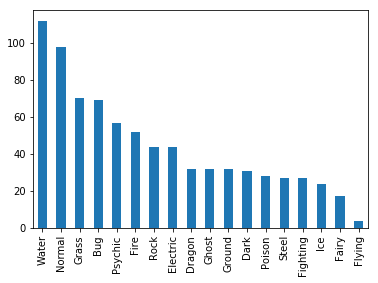

In [3]:
pokemon['Class 1'].value_counts().plot.bar();

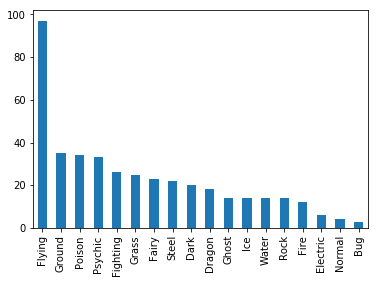

In [4]:
pokemon['Class 2'].value_counts().plot.bar();

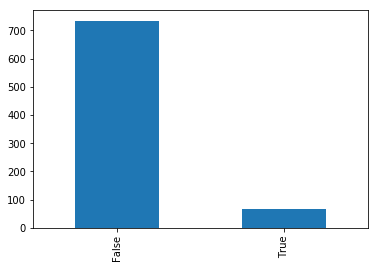

In [5]:
pokemon.Legendary.value_counts().plot.bar();

In [6]:
pokemon.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


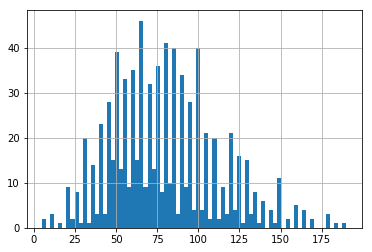

In [7]:
pokemon.Attack.hist(bins=75);

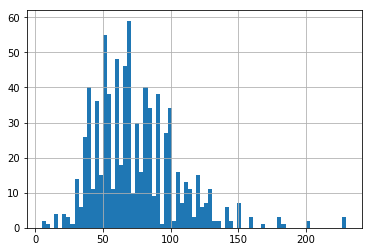

In [8]:
pokemon.Defense.hist(bins=75);

In [9]:
combats = pd.read_csv('combats.csv')
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


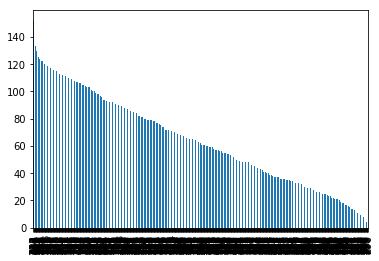

In [10]:
combats.Winner.value_counts().plot.bar();

In [11]:
combats.Winner.value_counts().describe()

count    783.000000
mean      63.856960
std       32.925941
min        3.000000
25%       36.000000
50%       62.000000
75%       91.000000
max      152.000000
Name: Winner, dtype: float64

# Q 1.2

## (i)

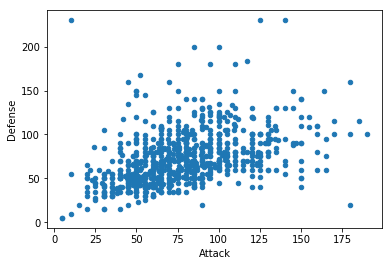

In [12]:
pokemon[['Attack', 'Defense']].plot.scatter(x='Attack', y='Defense');

## (ii)

In [13]:
lodr = pokemon.Attack / pokemon.Defense
lodr.sort_values(ascending=False, inplace=True)
lodr.name = 'lodr'
lodr.head()

pid
430    9.000
348    4.500
20     3.750
454    3.125
429    3.000
Name: lodr, dtype: float64

In [14]:
pd.DataFrame(lodr.iloc[:3]).join(pokemon.Name)

,lodr,Name
pid,,
430,9.00,DeoxysAttack Forme
348,4.50,Carvanha
20,3.75,Mega Beedrill


## (iii)

In [15]:
pd.DataFrame(lodr.iloc[-3:]).join(pokemon.Name)

,lodr,Name
pid,,
485,0.279070,Bronzor
140,0.181818,Magikarp
231,0.043478,Shuckle


## (iv)

In [16]:
pd.DataFrame(combats.Winner.value_counts().iloc[:10]).join(pokemon.Name)

,Winner,Name
163,152,Mewtwo
154,136,Aerodactyl
438,136,Infernape
428,134,Jirachi
432,133,Deoxys Speed Forme
314,133,Slaking
214,130,Murkrow
394,130,Mega Absol
249,128,Mega Houndoom
155,127,Mega Aerodactyl


# Q1.3

In [17]:
pokemon.head()

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
pid,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [18]:
grass_filter = ((pokemon['Class 1'] == 'Grass') | (pokemon['Class 2'] == 'Grass')) & (pokemon['Class 1'] != 'Rock') & (pokemon['Class 2'] != 'Rock')
grass_pms = pokemon[grass_filter]
print(f"{len(grass_pms)} grass pokemons")

93 grass pokemons


In [19]:
rock_filter = ((pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock')) & (pokemon['Class 1'] != 'Grass') & (pokemon['Class 2'] != 'Grass')
rock_pms = pokemon[rock_filter]
print(f"{len(rock_pms)} rock pokemons")

56 rock pokemons


In [20]:
ga = grass_pms[['Attack']]
ga.describe()

,Attack
count,93.000000
mean,73.731183
std,24.179645
min,27.000000
25%,59.000000
50%,70.000000
75%,95.000000
max,132.000000


In [21]:
ra = rock_pms[['Attack']]
ra.describe()

,Attack
count,56.000000
mean,91.785714
std,34.805284
min,10.000000
25%,63.000000
50%,92.500000
75%,116.250000
max,165.000000


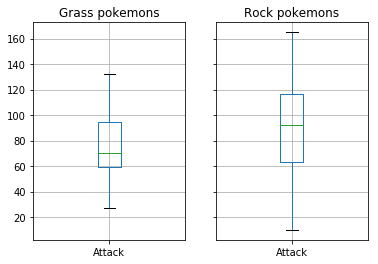

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
ga.boxplot(ax=ax1);
ra.boxplot(ax=ax2);
ax1.title.set_text('Grass pokemons')
ax2.title.set_text('Rock pokemons')

# Q2.1 & 2.2

In [23]:
isnan = lambda a: a != a    

In [24]:
types = list(set(pokemon['Class 1'].unique()).union(set(pokemon['Class 2'][pokemon['Class 2'].notna()].unique())))

In [25]:
class_features = pd.DataFrame(data=False, index=pokemon.index, columns=types)
class_features.head()

,Fighting,Fairy,Ground,Grass,Dragon,Electric,Normal,Rock,Dark,Ghost,Poison,Fire,Flying,Steel,Ice,Water,Bug,Psychic
pid,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
for i, a, b in pokemon[['Class 1', 'Class 2']].itertuples(name=None):
    class_features.loc[i, a] = True
    if not isnan(b):
        class_features.loc[i, b] = True
class_features.head()

,Fighting,Fairy,Ground,Grass,Dragon,Electric,Normal,Rock,Dark,Ghost,Poison,Fire,Flying,Steel,Ice,Water,Bug,Psychic
pid,,,,,,,,,,,,,,,,,,
1,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [27]:
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [28]:
pokemon_features = pokemon.join(class_features)[['HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Legendary']+types]

In [29]:
left = pokemon_features.loc[combats.First_pokemon.to_list()]
left.index = combats.index
right = pokemon_features.loc[combats.Second_pokemon.to_list()]
right.index = combats.index
combat_features = left.join(right, lsuffix='0', rsuffix='1')

In [30]:
y = combats.First_pokemon == combats.Winner

In [31]:
train = combat_features.sample(frac=0.9)
test = combat_features.drop(train.index)
train_y = y.loc[train.index]
test_y = y.loc[test.index]

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
pred = pd.DataFrame()
for m in [2, 4, 10]:
    for n in [10, 25, 50, 100]:
        clf=RandomForestClassifier(n_estimators=n, max_depth=m)
        clf.fit(train, train_y)
        y_pred = clf.predict(test)
        y_pred = pd.Series(y_pred, index=test.index)
        y_pred.name = (m, n)
        pred = pred.append(y_pred)
        print(f"{(m, n)} done.")
        
pred = pred.astype(bool)
pred.head()

(2, 10) done.
(2, 25) done.
(2, 50) done.
(2, 100) done.
(4, 10) done.
(4, 25) done.
(4, 50) done.
(4, 100) done.
(10, 10) done.
(10, 25) done.
(10, 50) done.
(10, 100) done.


,15,40,44,46,82,88,89,97,107,115,...,49857,49867,49874,49882,49884,49892,49906,49939,49970,49990
"(2, 10)",False,False,False,False,True,True,False,False,False,True,...,False,False,True,True,False,False,True,False,False,False
"(2, 25)",False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
"(2, 50)",False,False,False,True,True,True,False,False,False,True,...,False,False,True,True,False,False,True,False,False,False
"(2, 100)",False,False,False,False,True,True,False,False,False,True,...,False,False,True,True,False,False,False,False,False,False
"(4, 10)",False,False,False,False,False,True,False,False,False,True,...,False,False,True,False,False,False,True,False,False,False


In [34]:
def evaluate(pred, truth=test_y):
    n = len(truth)
    TP = (pred & truth).sum()
    TN = (~pred & ~truth).sum()
    FP = (pred & ~truth).sum()
    FN = (~pred & truth).sum()
    acc = (TP + TN) / n
    prec = TP/(TP + FP)
    rec = TP/(TP + FN)
    f1 = (2*prec*rec)/(prec+rec)
    return pd.Series({
        'TP': TP,
        'TN': TN,
        'FP': FP,
        'FN': FN,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1
    })
evaluation = pred.apply(evaluate, axis=1)
evaluation

,TP,TN,FP,FN,accuracy,precision,recall,f1
"(2, 10)",1676.0,2200.0,474.0,650.0,0.7752,0.779535,0.720550,0.748883
"(2, 25)",1645.0,2233.0,441.0,681.0,0.7756,0.788591,0.707223,0.745694
"(2, 50)",1577.0,2318.0,356.0,749.0,0.7790,0.815830,0.677988,0.740549
"(2, 100)",1638.0,2300.0,374.0,688.0,0.7876,0.814115,0.704213,0.755187
"(4, 10)",1708.0,2325.0,349.0,618.0,0.8066,0.830335,0.734308,0.779375
"(4, 25)",1709.0,2364.0,310.0,617.0,0.8146,0.846459,0.734738,0.786651
"(4, 50)",1828.0,2324.0,350.0,498.0,0.8304,0.839302,0.785899,0.811723
"(4, 100)",1874.0,2373.0,301.0,452.0,0.8494,0.861609,0.805675,0.832704
"(10, 10)",2105.0,2422.0,252.0,221.0,0.9054,0.893084,0.904987,0.898996
"(10, 25)",2125.0,2445.0,229.0,201.0,0.9140,0.902719,0.913586,0.908120


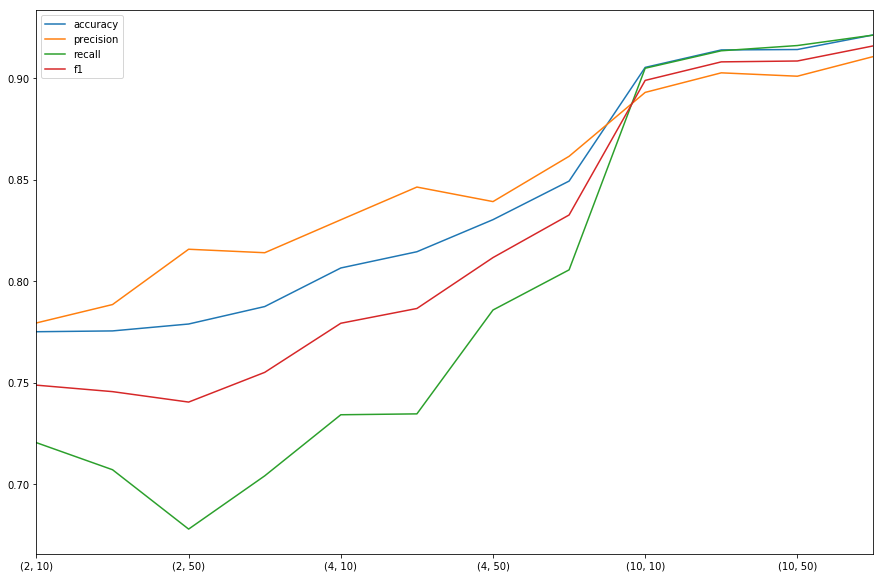

In [35]:
evaluation[['accuracy', 'precision', 'recall', 'f1']].plot(figsize=(15, 10));

# Q 2.5 & 2.6

In [36]:
from sklearn.model_selection import KFold

In [37]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
ev = pd.DataFrame()
train_ixs, test_ixs, pred = [], [], []
for train, test in kf.split(combat_features):
    train_ixs.append(train)
    test_ixs.append(test)
    clf=RandomForestClassifier(n_estimators=100, max_depth=10)
    clf.fit(combat_features.loc[train], y.loc[train])
    y_pred = clf.predict(combat_features.loc[test])
    y_pred = y_pred.astype(bool)
    pred.append(y_pred)
    evaluation = evaluate(y_pred, y.loc[test])
    ev = ev.append(evaluation, ignore_index=True)
    print(f"Fold done.")
    
ev.head()

Fold done.
Fold done.
Fold done.
Fold done.
Fold done.
Fold done.
Fold done.
Fold done.
Fold done.
Fold done.


,FN,FP,TN,TP,accuracy,f1,precision,recall
0,201.0,184.0,2418.0,2197.0,0.9230,0.919439,0.922722,0.916180
1,166.0,214.0,2431.0,2189.0,0.9240,0.920135,0.910945,0.929512
2,203.0,215.0,2428.0,2154.0,0.9164,0.911553,0.909244,0.913874
3,182.0,219.0,2400.0,2199.0,0.9198,0.916441,0.909429,0.923562
4,189.0,211.0,2502.0,2098.0,0.9200,0.912968,0.908618,0.917359


In [38]:
ev.describe()

,FN,FP,TN,TP,accuracy,f1,precision,recall
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,194.400000,212.200000,2427.700000,2165.700000,0.918680,0.914172,0.910756,0.917635
std,13.517067,11.113555,28.417717,28.959934,0.003464,0.003802,0.004657,0.005542
min,166.000000,184.000000,2400.000000,2098.000000,0.912200,0.907792,0.906263,0.908747
25%,190.250000,211.750000,2418.000000,2157.250000,0.916700,0.911907,0.908775,0.916204
50%,197.000000,214.000000,2426.000000,2165.500000,0.918800,0.913231,0.909662,0.916420
75%,200.250000,218.000000,2428.000000,2184.750000,0.920000,0.916251,0.910767,0.917844
max,217.000000,223.000000,2502.000000,2199.000000,0.924000,0.920135,0.922722,0.929512


In [39]:
pd.Series(clf.feature_importances_,index=combat_features.columns).sort_values(ascending=False).iloc[:20]

Speed0        0.325379
Speed1        0.307796
Attack0       0.049916
Attack1       0.044044
Sp. Atk1      0.035340
Sp. Atk0      0.034233
HP0           0.023883
HP1           0.022562
Sp. Def1      0.021098
Sp. Def0      0.020454
Defense1      0.014822
Defense0      0.014546
Legendary0    0.009469
Legendary1    0.008591
Flying0       0.008381
Flying1       0.006943
Ghost1        0.004189
Ghost0        0.002973
Normal1       0.002777
Electric0     0.002449
dtype: float64

# Q3.1

In [40]:
n_battles = combats.First_pokemon.value_counts() + combats.Second_pokemon.value_counts()
n_battles.sum()

100000

In [41]:
ratio = combats.groupby('Winner').size() / n_battles

In [42]:
pd.DataFrame(ratio.sort_values(ascending=False).iloc[:10], columns=['win_ratio']).join(pokemon)

,win_ratio,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
155,0.984496,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,False
513,0.974790,Weavile,Dark,Ice,70,120,65,45,85,125,False
704,0.968000,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,True
20,0.966387,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
154,0.964539,Aerodactyl,Rock,Flying,80,105,65,60,75,130,False
477,0.961240,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False
727,0.960630,Greninja,Water,Dark,72,95,67,103,71,122,False
717,0.959350,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,False
165,0.952000,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,True
350,0.950000,Mega Sharpedo,Water,Dark,70,140,70,110,65,105,False


In [43]:
pokemon.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


# Q 3.2

In [44]:
G = pd.DataFrame(data=0, index=pokemon.index, columns=pokemon.index)
G.head()

pid,1,2,3,4,5,6,7,8,9,10,...,791,792,793,794,795,796,797,798,799,800
pid,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
def dominance(df):
    a = df.iloc[0].First_pokemon
    
    def wins(df):
        n = len(df)
        a_wins = (df.Winner == a).sum()
        b_wins = n-a_wins
        return a_wins - b_wins
    
    return df.groupby('Second_pokemon').apply(wins)
    
domi = combats.groupby('First_pokemon').apply(dominance)
domi.head(10)

First_pokemon  Second_pokemon
1              6                -1
               26               -1
               37               -1
               43               -1
               54               -1
               75               -2
               84               -1
               112              -1
               115              -1
               131              -1
dtype: int64

The above table holds the result aggregation for every combination of a `First_pokemon` with a `Second_pokemn`. The number is negative when the second pokemon won more often. In the next step, these values will be unstacked into a matrix and then aggregated via a diagonal fold.

In [92]:
pd.set_option('display.max_columns', 200)
domi_matrix = domi.unstack().fillna(0).astype(int)
domi_matrix.iloc[:30, :30]

Second_pokemon,1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
First_pokemon,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0
2,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,-1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [101]:
only_positive = domi_matrix.where(domi_matrix>-1, 0)\
               + domi_matrix.where(domi_matrix<0, 0).T*(-1) # negative values converted to positive in the transposed position
only_positive.iloc[:20, :20]

Second_pokemon,1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20,21
First_pokemon,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:
G = pd.DataFrame(data=0, index=domi_matrix.index, columns=domi_matrix.index)
G = G.where(~(only_positive > only_positive.T), 1)
G.loc[:20, :20]

First_pokemon,1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20
First_pokemon,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Q 3.2

$G + G^2$ is leaning on the idea of Katz centrality. In $G$, for every pokemon $i$ the sum of its row is the number $J$ of pokemons dominated by $i$. $G^2$ represents the number of pokemons $K$ dominated on their turn by the dominated $J$. That is to say, the dominant the dominated pokemon $J$ are, the higher the dominance score.

In [107]:
A = G + G ** 2
A.loc[:20, :20]

First_pokemon,1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20
First_pokemon,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0
4,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0
5,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
8,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Q 3.3

In [108]:
ranking = A.sum(axis=1).sort_values(ascending=False)
pd.DataFrame(ranking[:10], columns=['dominance']).join(pokemon)

,dominance,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
First_pokemon,,,,,,,,,,,
163,276,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True
154,250,Aerodactyl,Rock,Flying,80,105,65,60,75,130,False
432,250,Deoxys Speed Forme,Psychic,NaN,50,95,90,95,90,180,True
428,248,Jirachi,Steel,Psychic,100,100,100,100,100,100,True
214,242,Murkrow,Dark,Flying,60,85,42,85,42,91,False
249,240,Mega Houndoom,Dark,Fire,75,90,90,140,90,115,False
394,240,Mega Absol,Dark,NaN,65,150,60,115,60,115,False
155,238,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,False
164,236,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,True


For comparison:

In [54]:
pd.DataFrame(ratio.sort_values(ascending=False).iloc[:10], columns=['win_ratio']).join(pokemon)

,win_ratio,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
155,0.984496,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,False
513,0.974790,Weavile,Dark,Ice,70,120,65,45,85,125,False
704,0.968000,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,True
20,0.966387,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
154,0.964539,Aerodactyl,Rock,Flying,80,105,65,60,75,130,False
477,0.961240,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False
727,0.960630,Greninja,Water,Dark,72,95,67,103,71,122,False
717,0.959350,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,False
165,0.952000,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,True
350,0.950000,Mega Sharpedo,Water,Dark,70,140,70,110,65,105,False


One surprise is that Murkrow doesn't have outstnding feature values but appears in the new top 10. The combat data show that Murkrow won 82.3 % of the battles.

In [115]:
won = combats[(combats.First_pokemon == 214) | (combats.Second_pokemon == 214)].Winner.value_counts()
print(f"Murkrow won {(won[214] / won.sum() * 100).round(1)} % of the battles.")

Murkrow won 82.3 % of the battles.
